In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X = X[y != 0, :2]
y = y[y != 0]

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X = X[y != 0, :2]

In [8]:
y = y[y != 0]

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
n_sample = len(X)

In [11]:
n_sample

100

In [12]:
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

In [14]:
y

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
       1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1.])

In [21]:
X_train = X[:int(.9 * n_sample)]


In [22]:
y_train = y[:int(.9 * n_sample)]


In [23]:
y_train

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1., 2.,
       1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2.])

In [24]:
X_test = X[int(.9 * n_sample):]


In [25]:
y_test = y[int(.9 * n_sample):]

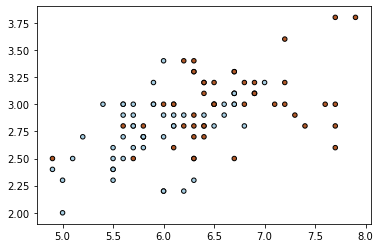

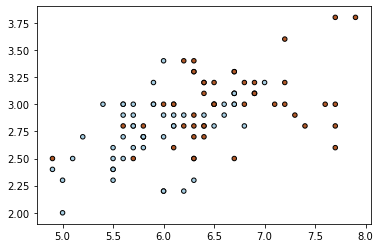

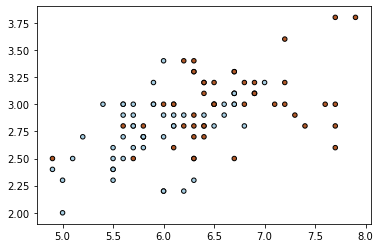

In [26]:
# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

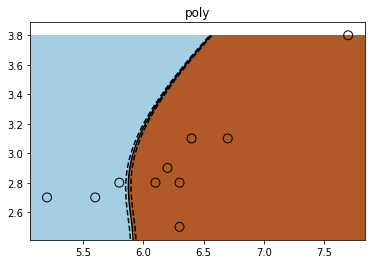

In [36]:
   # Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])   


    # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title(kernel)
plt.show()

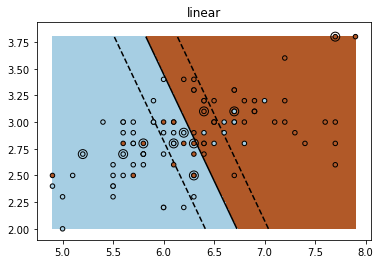

In [41]:
# fit the model

clf = svm.SVC(kernel='linear', gamma=10)
clf.fit(X_train, y_train)
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    
       # Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])   


    # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title("linear")
plt.show()

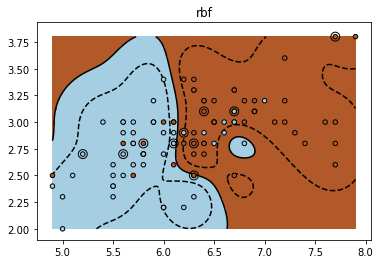

In [42]:
# fit the model

clf = svm.SVC(kernel='rbf', gamma=10)
clf.fit(X_train, y_train)
plt.figure()
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    
       # Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])   


    # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.title('rbf')
plt.show()